In [3]:
# save in JSON format

import numpy as np
import os
import json
from tqdm import tqdm 

dataset_folder = "/media/giancos/Football/dataset_crop224/"

labels = ["background", "card", "substitution", "goal"]

In [364]:
# GET CANDIDATE SPOT FROM ARGMAX
def get_spot_from_Argmax(array, thresh=0.5):
    """Return the border of a prediction at a given watershed threshold"""
    diff1 = np.insert(array,0,0)
    diff2 = np.append(array,0)
    t_init = np.argwhere( (diff1<thresh) & (diff2>=thresh))[:,0]
    t_end  = np.argwhere( (diff1>thresh) & (diff2<=thresh))[:,0]
    score = np.zeros(len(t_end))
    t_max = np.zeros(len(t_end))
    for i in range(len(t_end)):
        score[i] = np.mean(array[t_init[i]:t_end[i]])
        t_max[i] = t_init[i]+ np.argmax(array[t_init[i]:t_end[i]])
        score[i] = array[int(t_max[i])]
    segment_predictions = np.transpose([t_init, t_end])
    return  np.transpose([t_max, score])


for WaterShedThresh in tqdm(range(95,0,-5)):
    data = {}
    data["version"] = "VERSION 1.3"
    data["results"] = {}

    for Game in np.load(os.path.join(dataset_folder,"listgame_Test_100.npy")):
        for Half in [1,2]:
            predictions = np.load(os.path.join(dataset_folder, Game, "Predictions_Half_" + str(Half) + ".npy"))
            KeyGame=os.path.split(Game)[1] + "_Half_" + str(Half) + ".npy"
            data["results"][KeyGame] = {}
            data["results"][KeyGame] = []
            for l in range(1,4):
                spots = get_spot_from_Argmax(predictions[:,l], thresh=WaterShedThresh/100)
                for spot in spots:
                    result = {"label":labels[l], "segment":[int(spot[0]), int(spot[0]+1)], "score":spot[1]}
                    data["results"][KeyGame].append(result)


    with open("Results_Spot/predictions_Argmax_"+str(WaterShedThresh)+".json", 'w') as f:
        json.dump(data, f, indent = 4)
        
        
        
for Wind in tqdm([60,50,40,30,20,10,5]):
    
    WaterShedThresh = 50
    data = {}
    data["version"] = "VERSION 1.3"
    data["results"] = {}
    for Game in np.load(os.path.join(dataset_folder,"listgame_Test_100.npy")):
        for Half in [1,2]:
            predictions = np.load(os.path.join(dataset_folder, Game, "Predictions_augm_"+str(Wind)+"_Half_" + str(Half) + ".npy"))
            KeyGame=os.path.split(Game)[1] + "_Half_" + str(Half) + ".npy"
            data["results"][KeyGame] = {}
            data["results"][KeyGame] = []
            for l in range(1,4):
                spots = get_spot_from_Argmax(predictions[:,l], thresh=WaterShedThresh/100)
                for spot in spots:
                    result = {"label":labels[l], "segment":[int(spot[0]), int(spot[0]+1)], "score":spot[1]}
                    data["results"][KeyGame].append(result)


    with open("Results_Spot/predictions_"+str(Wind)+"_Argmax_50.json", 'w') as f:
        json.dump(data, f, indent = 4)

100%|██████████| 7/7 [00:06<00:00,  1.30it/s]


In [365]:
# GET CANDIDATE SPOT FROM CENTER
def get_spot_from_Center(array, thresh=0.5):
    """Return the border of a prediction at a given watershed threshold"""
    diff1 = np.insert(array,0,0)
    diff2 = np.append(array,0)
    t_init = np.argwhere( (diff1<thresh) & (diff2>=thresh))[:,0]
    t_end  = np.argwhere( (diff1>thresh) & (diff2<=thresh))[:,0]
    score = np.zeros(len(t_end))
    t_spot = np.zeros(len(t_end))
    for i in range(len(t_end)):
        score[i] = np.mean(array[t_init[i]:t_end[i]])
        t_spot[i] = (t_init[i] + t_end[i]) / 2
        score[i] = array[int(t_spot[i])]
    segment_predictions = np.transpose([t_init, t_end])
    return  np.transpose([t_spot, score])

for WaterShedThresh in tqdm(range(95,0,-5)):

    data = {}
    data["version"] = "VERSION 1.3"
    data["results"] = {}
    for Game in np.load(os.path.join(dataset_folder,"listgame_Test_100.npy")):
        for Half in [1,2]:
            predictions = np.load(os.path.join(dataset_folder, Game, "Predictions_Half_" + str(Half) + ".npy"))
            KeyGame=os.path.split(Game)[1] + "_Half_" + str(Half) + ".npy"
            data["results"][KeyGame] = {}
            data["results"][KeyGame] = []
            for l in range(1,4):
                spots = get_spot_from_Center(predictions[:,l], thresh=WaterShedThresh/100)
                for spot in spots:
                    result = {"label":labels[l], "segment":[int(spot[0]), int(spot[0]+1)], "score":spot[1]}
                    data["results"][KeyGame].append(result)


    with open("Results_Spot/predictions_Center_"+str(WaterShedThresh)+".json", 'w') as f:
        json.dump(data, f, indent = 4)
        
        
for Wind in tqdm([60,50,40,30,20,10,5]):

    WaterShedThresh = 50
    data = {}
    data["version"] = "VERSION 1.3"
    data["results"] = {}
    for Game in np.load(os.path.join(dataset_folder,"listgame_Test_100.npy")):
        for Half in [1,2]:
            predictions = np.load(os.path.join(dataset_folder, Game, "Predictions_augm_"+str(Wind)+"_Half_" + str(Half) + ".npy"))
            KeyGame=os.path.split(Game)[1] + "_Half_" + str(Half) + ".npy"
            data["results"][KeyGame] = {}
            data["results"][KeyGame] = []
            for l in range(1,4):
                spots = get_spot_from_Center(predictions[:,l], thresh=WaterShedThresh/100)
                for spot in spots:
                    result = {"label":labels[l], "segment":[int(spot[0]), int(spot[0]+1)], "score":spot[1]}
                    data["results"][KeyGame].append(result)


    with open("Results_Spot/predictions_"+str(Wind)+"_Center_50.json", 'w') as f:
        json.dump(data, f, indent = 4)

100%|██████████| 7/7 [00:05<00:00,  1.46it/s]


In [366]:
# GET CANDIDATE SPOT FROM NMS
import numpy as np
def get_spot_from_NMS(Input, window=60, thresh=0.5):

    res = np.empty(np.size(Input), dtype=bool)

#     res = np.r_[True, Input[1:] < Input[:-1]] & np.r_[Input[:-1] < Input[1:], True]

    for i, value  in enumerate(Input):
        if (i<=window/2 or i>=np.size(Input)-window/2):
            res[i] = False
            continue
            
        if value >= np.max(Input[i+1:(i+int(window/2))]) and \
            value > np.max(Input[(i-int(window/2)):i]) and \
            value > thresh:
            res[i] = True
        else:
            res[i] = False
        
    
    MaxValues = Input[res==True]
    indexes = np.arange(np.size(Input))[res==True]
    return indexes, MaxValues



WaterShedThresh = 50
data = {}
data["version"] = "VERSION 1.3"
data["results"] = {}
for Game in np.load(os.path.join(dataset_folder,"listgame_Test_100.npy")):
    for Half in [1,2]:
        predictions = np.load(os.path.join(dataset_folder, Game, "Predictions_Half_" + str(Half) + ".npy"))
        KeyGame=os.path.split(Game)[1] + "_Half_" + str(Half) + ".npy"
        data["results"][KeyGame] = {}
        data["results"][KeyGame] = []
        for l in range(1,4):
            Input = predictions[:,l]
            indexes, scores = get_spot_from_NMS(Input, thresh=WaterShedThresh/100)
            for i in range(len(indexes)):
                spot = indexes[i]
                score = scores[i]
#                 if (score > WaterShedThresh/100):
                result = {"label":labels[l], "segment":[int(spot), int(spot+1)], "score":float(score)}
                data["results"][KeyGame].append(result)   


with open("Results_Spot/predictions_NMS_"+str(WaterShedThresh)+".json", 'w') as f:
    json.dump(data, f, indent = 4)

        
for WaterShedThresh in tqdm(range(95,0,-5)):

    data = {}
    data["version"] = "VERSION 1.3"
    data["results"] = {}
    for Game in np.load(os.path.join(dataset_folder,"listgame_Test_100.npy")):
        for Half in [1,2]:
            predictions = np.load(os.path.join(dataset_folder, Game, "Predictions_Half_" + str(Half) + ".npy"))
            KeyGame=os.path.split(Game)[1] + "_Half_" + str(Half) + ".npy"
            data["results"][KeyGame] = {}
            data["results"][KeyGame] = []
            for l in range(1,4):
                Input = predictions[:,l]
                indexes, scores = get_spot_from_NMS(Input, thresh=WaterShedThresh/100)
                for i in range(len(indexes)):
                    spot = indexes[i]
                    score = scores[i]
#                     if (score > WaterShedThresh/100):
                    result = {"label":labels[l], "segment":[int(spot), int(spot+1)], "score":float(score)}
                    data["results"][KeyGame].append(result)   


    with open("Results_Spot/predictions_NMS_"+str(WaterShedThresh)+".json", 'w') as f:
        json.dump(data, f, indent = 4)
        
        
         
for Wind in tqdm([60,50,40,30,20,10,5]):

    WaterShedThresh = 50
    data = {}
    data["version"] = "VERSION 1.3"
    data["results"] = {}
    for Game in np.load(os.path.join(dataset_folder,"listgame_Test_100.npy")):
        for Half in [1,2]:
            predictions = np.load(os.path.join(dataset_folder, Game, "Predictions_augm_"+str(Wind)+"_Half_" + str(Half) + ".npy"))
            KeyGame=os.path.split(Game)[1] + "_Half_" + str(Half) + ".npy"
            data["results"][KeyGame] = {}
            data["results"][KeyGame] = []
            for l in range(1,4):
                Input = predictions[:,l]
                indexes, scores = get_spot_from_NMS(Input, thresh=WaterShedThresh/100)
                for i in range(len(indexes)):
                    spot = indexes[i]
                    score = scores[i]
#                     if (score > WaterShedThresh/100):
                    result = {"label":labels[l], "segment":[int(spot), int(spot+1)], "score":float(score)}
                    data["results"][KeyGame].append(result)   


    with open("Results_Spot/predictions_"+str(Wind)+"_NMS_50.json", 'w') as f:
        json.dump(data, f, indent = 4)
        
        


100%|██████████| 7/7 [01:18<00:00, 11.31s/it]


[ 0.61797769  0.61637849  0.6159689   0.61389743  0.61121048  0.60142909
  0.58571826  0.532353    0.48128067  0.40138267  0.33427653  0.26864296
  0.22459036  0.14935262  0.10050969  0.05169219  0.02806714  0.00416629]


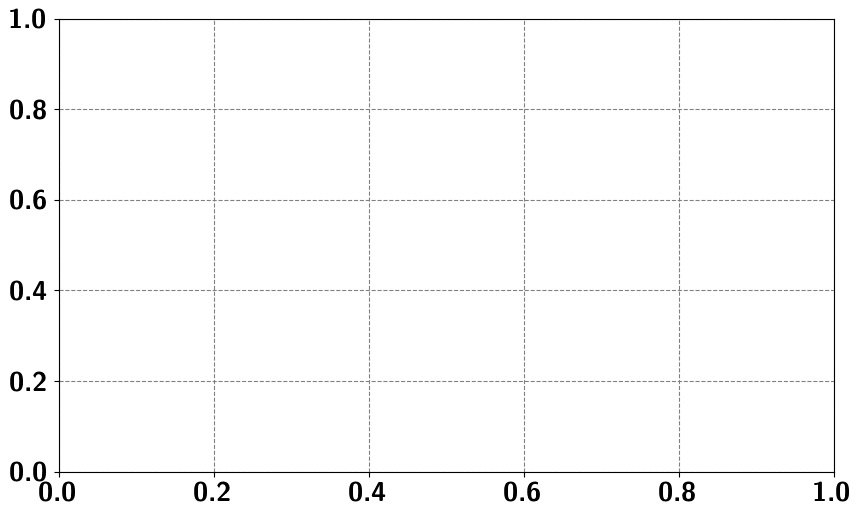

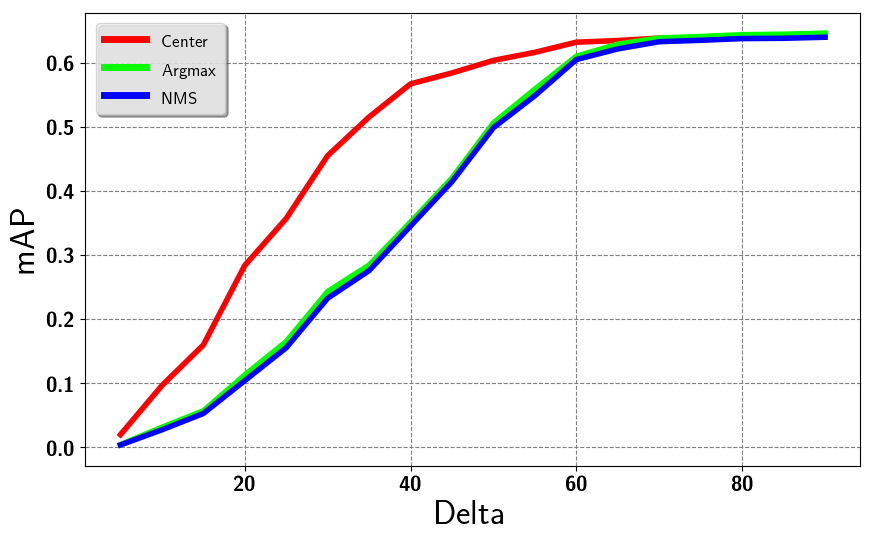

In [5]:

from matplotlib import pyplot as plt
import matplotlib.patheffects as PathEffects

import numpy as np
import matplotlib


matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams.update({'font.family': "sans-serif"})
matplotlib.rcParams.update({'font.sans-serif': "Time"})
plt.rc('text', usetex=True)


fig, ax = plt.subplots(num=None, 
                       figsize=(10, 6), 
                       dpi=100, 
                       facecolor='w',
                       edgecolor='k')

ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
ax.yaxis.grid(color='gray', linestyle='dashed')

# for j, Thresh in enumerate(range(95,0,-5)):
#     try:

ax.plot(np.arange(90,0,-5), np.load("Evaluation/Spotting_Center_10.npy"),color=[1,0,0,], label='Center', linewidth=4.0)
ax.plot(np.arange(90,0,-5), np.load("Evaluation/Spotting_Argmax_10.npy"),color=[0,1,0,], label='Argmax', linewidth=4.0)
ax.plot(np.arange(90,0,-5), np.load("Evaluation/Spotting_NMS_10.npy"),color=[0,0,1,], label='NMS', linewidth=4.0)
print(np.load("Evaluation/Spotting_NMS_50.npy"))

#     except:
# print(Thresh, "missing")
        
legend = ax.legend(loc='upper left', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.95')


# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('small')

for label in legend.get_lines():
    label.set_linewidth(5)  # the legend line width

    
plt.ylabel("mAP", fontsize=25)
plt.xlabel("Delta", fontsize=25)
plt.show()


folder = "/home/giancos/Dropbox/Applicazioni/ShareLaTeX/CVPR18_Football/img/Results/"

# fig.savefig(folder + 'GraphSpotting.png',bbox_inches='tight')


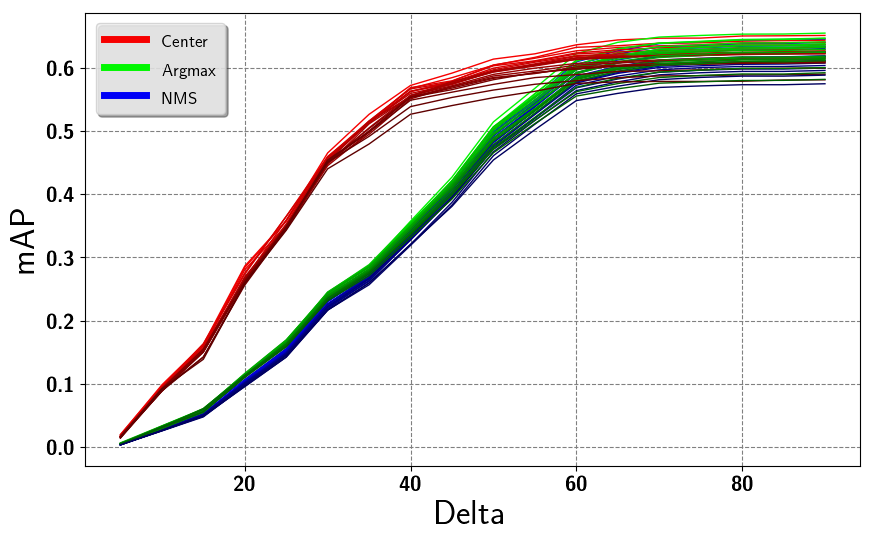

In [6]:

from matplotlib import pyplot as plt
import matplotlib.patheffects as PathEffects

import numpy as np
import matplotlib


matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams.update({'font.family': "sans-serif"})
matplotlib.rcParams.update({'font.sans-serif': "Time"})
plt.rc('text', usetex=True)


fig, ax = plt.subplots(num=None, 
                       figsize=(10, 6), 
                       dpi=100, 
                       facecolor='w',
                       edgecolor='k')

ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
ax.yaxis.grid(color='gray', linestyle='dashed')

for j, Thresh in enumerate(range(5,100,5)):
    try:

        ax.plot(np.arange(90,0,-5), np.load("Evaluation/Spotting_Center_"+str(Thresh)+".npy"), 
                label='Center'+str(Thresh), linewidth=1.0, color=[1-Thresh/150,0,0])
    except:
        print("missing Center",Thresh)
    try:
        ax.plot(np.arange(90,0,-5), np.load("Evaluation/Spotting_Argmax_"+str(Thresh)+".npy"), 
                label='Argmax'+str(Thresh), linewidth=1.0, color=[0,1-Thresh/150,0])
    except:
        print("missing ArgMax", Thresh)
    try:
        ax.plot(np.arange(90,0,-5), np.load("Evaluation/Spotting_NMS_"+str(Thresh)+".npy"), 
                label='NMS'+str(Thresh), linewidth=1.0, color=[0,0,1-Thresh/150])

    except:
        print("missing NMS", Thresh)
        
# plt.fill_between([40,60], [0.3,0.3], [0.4,0.4], alpha=0.25, linewidth=0, color='#B22400')

legend = ax.legend(["Center", "Argmax", "NMS"],loc='upper left', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.95')


# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('small')

for label in legend.get_lines():
    label.set_linewidth(5)  # the legend line width

    
plt.ylabel("mAP", fontsize=25)
plt.xlabel("Delta", fontsize=25)
plt.show()


# folder = "/home/giancos/Dropbox/Applicazioni/ShareLaTeX/CVPR18_Football/img/Results/"

# fig.savefig(folder + 'GraphSpotting_All.png',bbox_inches='tight')


In [7]:

def getAreaUnderCurve(X,Y):
    return np.sum((Y[1:] + Y[:-1])/2 * np.abs(X[1:] - X[:-1])) / abs(X[-1] - X[0])


def getAreaAverage(X,Y):
    return np.sum((Y[1:] + Y[:-1])/2 * np.abs(X[1:] - X[:-1]))


# Input = np.array([1,2,3,4,5,4,3,2,1])
X = np.array([0,1,2,3,4,5,6,7,10])
Y = np.array([1,1,1,4,3,2,1,1,5])
print(X)
print(getAreaUnderCurve(X,Y))


[ 0  1  2  3  4  5  6  7 10]
2.2


Plateau-mAP [100 100 100]
Average-mAP: [[40 32 32]]


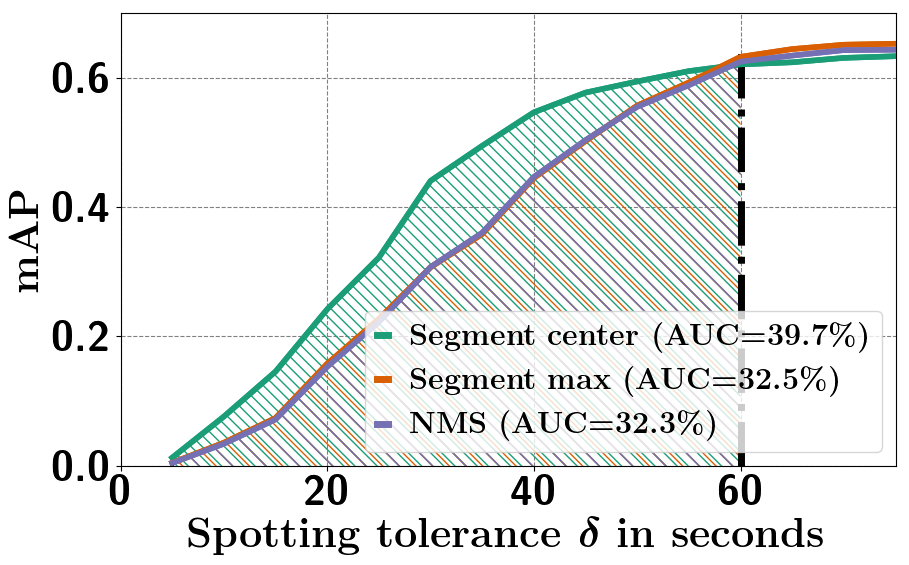

Plateau-mAP [100 100 100]
Average-mAP: [[43 40 40]]


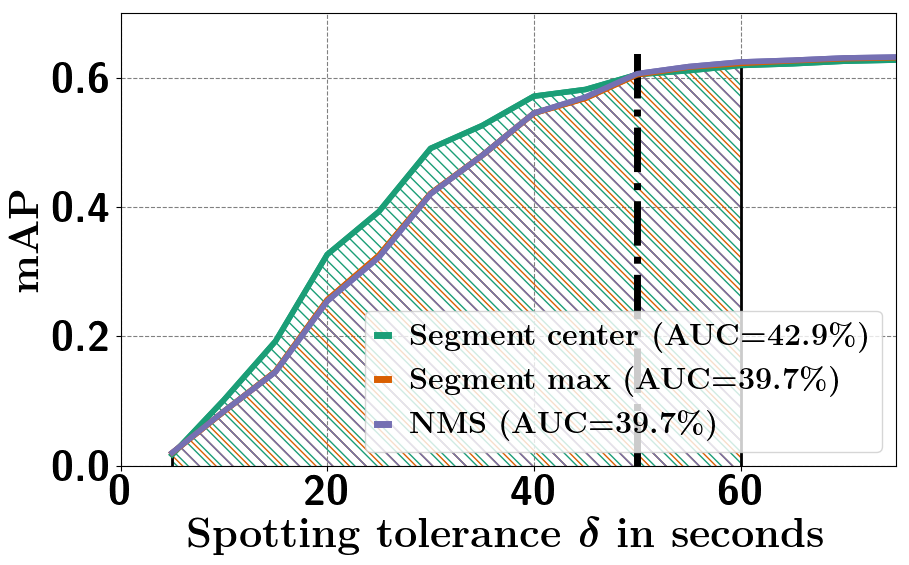

Plateau-mAP [100 100 100]
Average-mAP: [[49 46 46]]


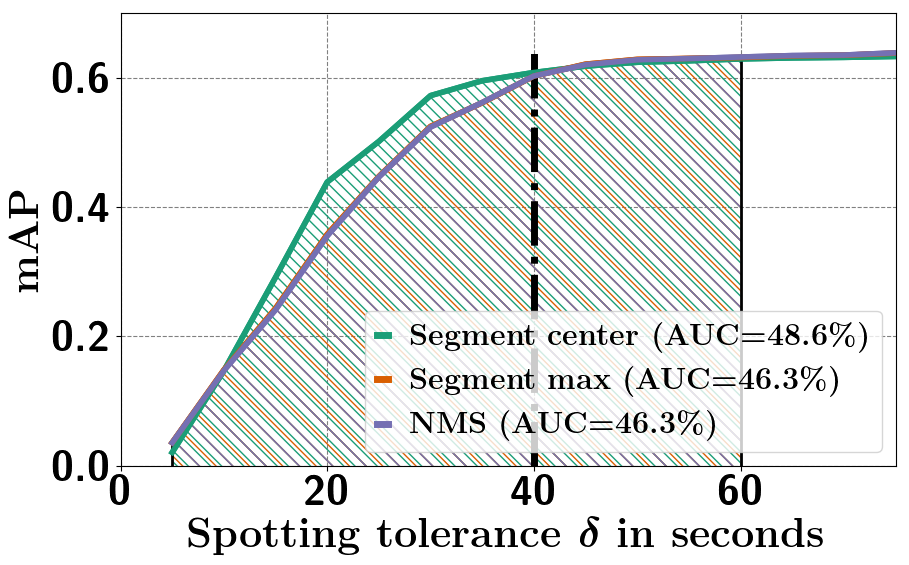

Plateau-mAP [100 100 100]
Average-mAP: [[48 45 45]]


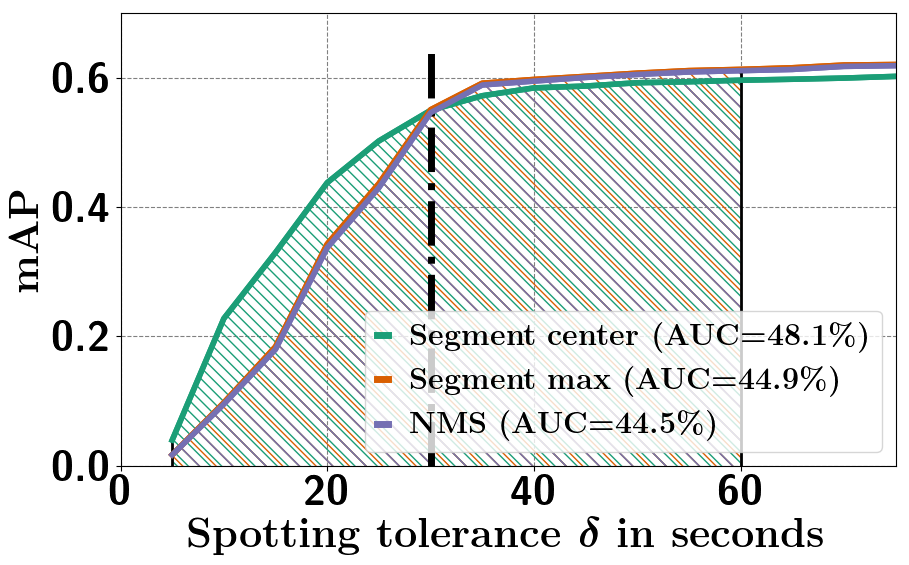

Plateau-mAP [100 100 100]
Average-mAP: [[50 49 49]]


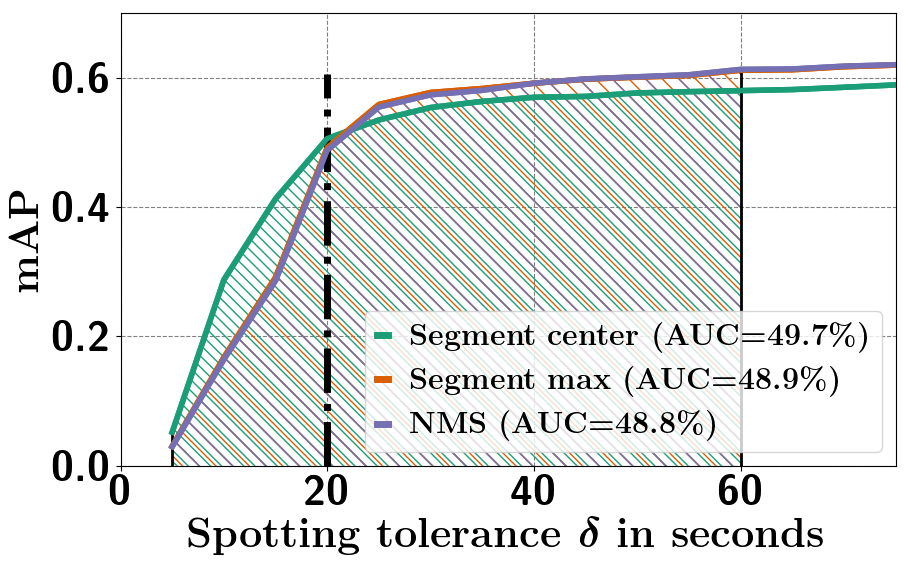

Plateau-mAP [100 100 100]
Average-mAP: [[48 49 49]]


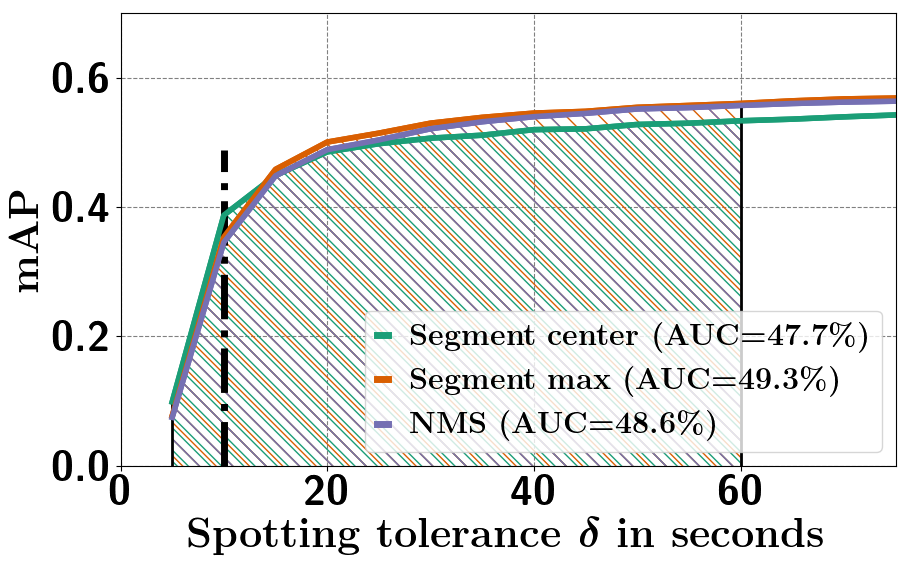

Plateau-mAP [0 0 0]
Average-mAP: [[33 35 35]]


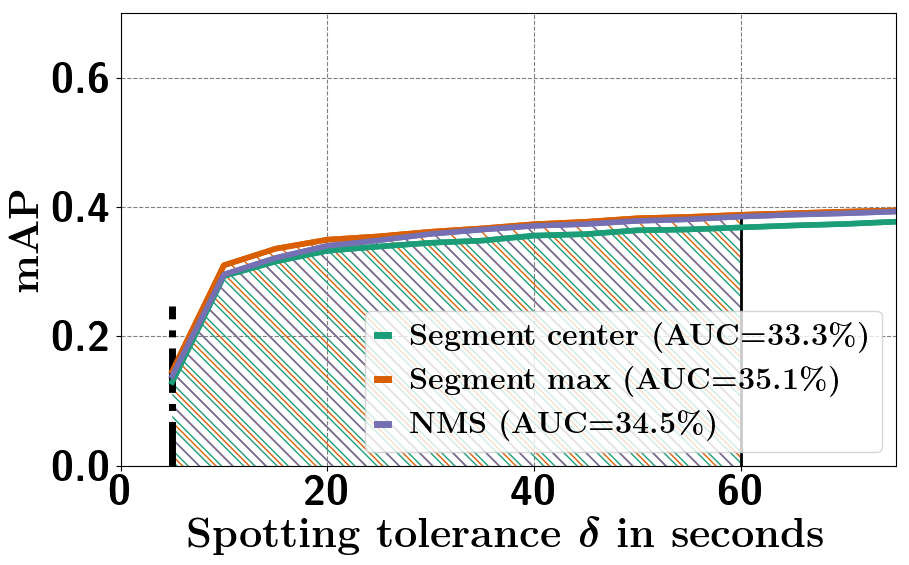

In [11]:


from matplotlib import pyplot as plt
import matplotlib.patheffects as PathEffects

import numpy as np
import matplotlib

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset


def PlotFigureScoreToleranceDelta(Center="Evaluation/Spotting_Center_50.npy",
                                  Argmax="Evaluation/Spotting_Argmax_50.npy",
                                  NMS="Evaluation/Spotting_NMS_50.npy",
                                  Window=60, Save="", STD=False, 
                                  Legend=True, Zoom=False, LegendLoc="upper left",
                                  AUC=True):

    matplotlib.rcParams.update({'font.size': 20})
    matplotlib.rcParams.update({'font.family': "serif"})
    matplotlib.rcParams.update({'font.sans-serif': "Time"})
    plt.rc('text', usetex=True)
    matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

    c = ["#1b9e77", "#d95f02", "#7570b3" ]


    fig, ax = plt.subplots(num=None, 
                           figsize=(10, 6), 
                           dpi=100, 
                           facecolor='w',
                           edgecolor='k')

    ax.set_axisbelow(True)
    ax.xaxis.grid(color='gray', linestyle='dashed')
    ax.yaxis.grid(color='gray', linestyle='dashed')

    #### USING K=512
    CenterNPY = np.load(Center)
    ArgmaxNPY = np.load(Argmax)
    NMSNPY = np.load(NMS)
    Area = [ getAreaUnderCurve(np.arange(60,0,-5), CenterNPY[-12:]), \
             getAreaUnderCurve(np.arange(60,0,-5), ArgmaxNPY[-12:]), \
             getAreaUnderCurve(np.arange(60,0,-5), NMSNPY[-12:]) ]  

    #### USING K=64
    # CenterNPY = np.load("Evaluation/Spotting_Center_Wind60.npy")
    # ArgmaxNPY = np.load("Evaluation/Spotting_Argmax_Wind60.npy")
    # NMSNPY = np.load("Evaluation/Spotting_NMS_Wind60.npy")
    # Spotting_Center_Wind60.npy


    ax.plot(np.arange(90,0,-5), CenterNPY, 
            label='Center', 
            linewidth=4.0, color=c[0])

    ax.plot(np.arange(90,0,-5), ArgmaxNPY, 
            label='Argmax', 
            linewidth=4.0, color=c[1])

    ax.plot(np.arange(90,0,-5), NMSNPY,
            label='NMS', 
            linewidth=4.0, color=c[2])
    
    
    



    ############ DEVIATION ######
        
    if(Window!=60):        
        maxValue=max([CenterNPY[int(60/-5)], ArgmaxNPY[int(60/-5)], NMSNPY[int(60/-5)]])        
        ax.plot([60,60], [0,min([0.65,maxValue])], linewidth=2.0, color='k')
                          
    if(Window!=5):        
        maxValue=max([CenterNPY[-1], ArgmaxNPY[-1], NMSNPY[-1]])        
        ax.plot([5,5], [0,min([0.65,maxValue])], linewidth=2.0, color='k')
    
    
    maxValue=max([CenterNPY[int(Window/-5)], ArgmaxNPY[int(Window/-5)], NMSNPY[int(Window/-5)]])                          
    ax.plot([Window,Window], 
            [0,min([0.65,0.1+maxValue])], 
            linewidth=5.0, color='k', linestyle="-.")
    
    if (STD):
        max_Center = np.load("Evaluation/Spotting_Center_50.npy")
        min_Center = np.load("Evaluation/Spotting_Center_50.npy")
        max_Argmax = np.load("Evaluation/Spotting_Argmax_50.npy")
        min_Argmax = np.load("Evaluation/Spotting_Argmax_50.npy")
        max_NMS = np.load("Evaluation/Spotting_NMS_50.npy")
        min_NMS = np.load("Evaluation/Spotting_NMS_50.npy")

        for j, Thresh in enumerate(range(5,100,5)):    
            max_Center = np.maximum(np.load("Evaluation/Spotting_Center_"+str(Thresh)+".npy"), max_Center)
            min_Center = np.minimum(np.load("Evaluation/Spotting_Center_"+str(Thresh)+".npy"), min_Center)

            max_Argmax = np.maximum(np.load("Evaluation/Spotting_Argmax_"+str(Thresh)+".npy"), max_Argmax)
            min_Argmax = np.minimum(np.load("Evaluation/Spotting_Argmax_"+str(Thresh)+".npy"), min_Argmax)

            max_NMS = np.maximum(np.load("Evaluation/Spotting_NMS_"+str(Thresh)+".npy"), max_NMS)
            min_NMS = np.minimum(np.load("Evaluation/Spotting_NMS_"+str(Thresh)+".npy"), min_NMS)

    if (STD):
        ax.fill_between(np.arange(90,0,-5), 
                        min_Center, max_Center, 
                        alpha=0.25, linewidth=0, 
                        color=c[0])
    ax.plot(np.arange(90,0,-5), CenterNPY, 
            label='Center', 
            linewidth=4.0, color=c[0])

    if (STD):
        ax.fill_between(np.arange(90,0,-5), 
                        min_Argmax, max_Argmax, 
                        alpha=0.25, linewidth=0, 
                        color=c[1])
    ax.plot(np.arange(90,0,-5), ArgmaxNPY, 
            label='Argmax', 
            linewidth=4.0, color=c[1])

    if (STD):
        ax.fill_between(np.arange(90,0,-5), 
                        min_NMS, max_NMS, 
                        alpha=0.25, linewidth=0, 
                        color=c[2])
    ax.plot(np.arange(90,0,-5), NMSNPY,
            label='NMS', 
            linewidth=4.0, color=c[2])

    #########################

    matplotlib.rcParams['hatch.color'] = c[0]
    matplotlib.rcParams['hatch.linewidth'] = 1
    ax.fill_between(np.arange(60,0,-5), [0]*12, 
                    CenterNPY[-12:],
                    alpha=0, linewidth=10,  hatch="\\"*3,)

    matplotlib.rcParams['hatch.color'] = c[1]
    ax.fill_between(np.arange(60,0,-5), [0]*12, 
                    ArgmaxNPY[-12:],
                    alpha=0, linewidth=10,  hatch="\\"*2,)
    
    matplotlib.rcParams['hatch.color'] = c[2]
    ax.fill_between(np.arange(60,0,-5), [0]*12, 
                    NMSNPY[-12:],
                    alpha=0, linewidth=10,  hatch="\\"*1,)

    
    if (AUC):
    #     txt = plt.text(25, 0.1, "%.2f" % (Area[0]), fontsize=40, color='k')
    #     txt.set_path_effects([PathEffects.withStroke(linewidth=4, foreground=c[0])])
    #     txt = plt.text(20, 0.0, "%.2f" % (Area[1]), fontsize=40, color='k')
    #     txt.set_path_effects([PathEffects.withStroke(linewidth=4, foreground=c[1])])
    #     txt = plt.text(30, 0.0, "%.2f" % (Area[2]), fontsize=40, color='k')
    #     txt.set_path_effects([PathEffects.withStroke(linewidth=4, foreground=c[2])])

        txt = plt.text(37-5, CenterNPY[-7]-0.07, "%.3f" % (Area[0]), 
                       fontsize=40, color='k', 
                       rotation=np.arctan(abs(CenterNPY[-6]-CenterNPY[-8])*6)*180/np.pi)
        txt.set_path_effects([PathEffects.withStroke(linewidth=4, foreground=c[0])])


        if(Window < 20):
            txt = plt.text(20-5, ArgmaxNPY[-4]-0.09, "%.3f" % (Area[1]), 
                       fontsize=40, color='k', 
                       rotation=np.arctan(abs(ArgmaxNPY[-3]-ArgmaxNPY[-5])*6)*180/np.pi)
        else:
            txt = plt.text(25-5, ArgmaxNPY[-5]-0.09, "%.3f" % (Area[1]), 
                       fontsize=40, color='k', 
                       rotation=np.arctan(abs(ArgmaxNPY[-4]-ArgmaxNPY[-6])*6)*180/np.pi)

        txt.set_path_effects([PathEffects.withStroke(linewidth=4, foreground=c[1])])



        if(Window < 20):
            txt = plt.text(55-5, NMSNPY   [-11]-0.09, "%.3f" % (Area[2]), 
                       fontsize=40, color='k',  
                       rotation=np.arctan(abs(NMSNPY[-10]-NMSNPY[-12])*6)*180/np.pi)
        else:
            txt = plt.text(50-5, NMSNPY   [-10]-0.09, "%.3f" % (Area[2]), 
                       fontsize=40, color='k',  
                       rotation=np.arctan(abs(NMSNPY[-9]-NMSNPY[-11])*6)*180/np.pi)

        txt.set_path_effects([PathEffects.withStroke(linewidth=4, foreground=c[2])])

    
    
    #######################
    ########## LEGEND ########

    if(Legend):
        if ("upper" in LegendLoc):
            legend = ax.legend([r"\textbf{Segment center (AUC="+str((round(Area[0]*100,1)))+"\%)}" , \
                            r"\textbf{Segment max (AUC="+str((round(Area[1]*100,1)))+"\%)}", \
                            r"\textbf{NMS (AUC="+str((round(Area[2]*100,1)))+"\%)}" ],
                           loc=LegendLoc, shadow=False, frameon=False,
                           prop={'weight':'bold'}, handlelength=0.4, )
        else:
            legend = ax.legend([r"\textbf{Segment center (AUC="+str((round(Area[0]*100,1)))+"\%)}" , \
                            r"\textbf{Segment max (AUC="+str((round(Area[1]*100,1)))+"\%)}", \
                            r"\textbf{NMS (AUC="+str((round(Area[2]*100,1)))+"\%)}" ],
                           loc=LegendLoc, shadow=False, frameon=True,
                           prop={'weight':'bold'}, handlelength=0.4, )
                   
            # Set the fontsize
            frame = legend.get_frame().set_facecolor('#FFFFFF')
            
        for label in legend.get_lines():
            label.set_linewidth(5)  # the legend line width
        
        for text in legend.get_texts():
            text.set_fontsize(22)
            
    plt.xlabel(r"\textbf{Spotting tolerance $\delta$ in seconds}", fontsize=30)
    plt.ylabel(r"\textbf{mAP}", fontsize=30)
    plt.tick_params(axis='both', which='major', labelsize=30)

    print("Plateau-mAP",(np.round(np.array([CenterNPY[0],ArgmaxNPY[0],NMSNPY[0]]))*100).astype(int)) 
    print("Average-mAP:", (np.round(np.array([Area])*100)).astype(int))

    plt.xlim((0,75))
    plt.ylim((0,0.7))

    #########################################
    ############ ZOOM #########
    if (Zoom):
#         x1, x2, y1, y2 = 62, 65, 0.590, 0.630
#         axins = zoomed_inset_axes(ax, 5, loc=4) # 
        x1, x2, y1, y2 = 59, 67, 0.540, 0.660
        axins = zoomed_inset_axes(ax, 2.5, loc=4) # 
        if (STD):
            axins.fill_between(np.arange(90,0,-5), min_Center, max_Center, 
                               alpha=0.25, linewidth=0, color=c[0])#'#B22400')
        axins.plot(np.arange(90,0,-5), CenterNPY, 
                        label='Center', linewidth=4.0, color=c[0])
        if (STD):
            axins.fill_between(np.arange(90,0,-5), min_Argmax, max_Argmax, 
                               alpha=0.25, linewidth=0, color=c[1])#'#B22400')
        axins.plot(np.arange(90,0,-5), ArgmaxNPY, 
                        label='Argmax', linewidth=4.0, color=c[1])
        if (STD):
            axins.fill_between(np.arange(90,0,-5), min_NMS, max_NMS, 
                               alpha=0.25, linewidth=0, color=c[2])#'#B22400')
        axins.plot(np.arange(90,0,-5), NMSNPY, 
                        label='NMS', linewidth=4.0, color=c[2])
        
        axins.plot([Window,Window], [0,0.7], linewidth=4.0, color='k', linestyle="-.")
        
        axins.set_xlim(x1, x2)
        axins.set_ylim(y1, y2)
        plt.xticks(visible=False)
        axins.xaxis.grid(color='gray', linestyle='dashed')
        axins.yaxis.grid(color='gray', linestyle='dashed')
        axins.yaxis.set_tick_params(labelsize=20)

        mark_inset(ax, axins, loc1=1, loc2=2, fc="none", ec="0.5")



    plt.show()


    if (Save!=""):
        fig.savefig(Save, bbox_inches='tight')
    
    
    return Area

        
        
###### MAIN #####
    
folder = "/home/giancos/Dropbox/Applicazioni/ShareLaTeX/CVPR18_Football/img/Results/"

# #### USING K=64
for W in [60,50,40,30,20,10,5]:
# for W in [20,5]:
    Area = PlotFigureScoreToleranceDelta(Center="Evaluation/Spotting_Center_Wind"+str(W)+".npy",
                                  Argmax="Evaluation/Spotting_Argmax_Wind"+str(W)+".npy",
                                  NMS="Evaluation/Spotting_NMS_Wind"+str(W)+".npy", 
                                  Save=folder+"GraphSpotting_ModelVLAD64_Wind"+str(W)+".png",
                                  Window=W, AUC=False, STD=False, Zoom=False, LegendLoc="lower right")
    

# # #### USING K=512
# PlotFigureScoreToleranceDelta(Center="Evaluation/Spotting_Center_50.npy",
#                               Argmax="Evaluation/Spotting_Argmax_50.npy",
#                               NMS="Evaluation/Spotting_NMS_50.npy", 
#                               Save=folder+'GraphSpotting_ModelVLAD512_Wind60.png', 
#                               Window=60, AUC=False, STD=False, Zoom=False, LegendLoc="lower right")

# Area = PlotFigureScoreToleranceDelta(Center="Evaluation/Spotting_Center_Wind20.npy",
#                                   Argmax="Evaluation/Spotting_Argmax_Wind20.npy",
#                                   NMS="Evaluation/Spotting_NMS_Wind20.npy", 
#                                   Save=folder+"GraphSpotting_ModelVLAD64_Wind20.png",
#                                   Window=20, AUC=False, STD=False, Legend=True, Zoom=False,LegendLoc="lower right")

# Area = PlotFigureScoreToleranceDelta(Center="Evaluation/Spotting_Center_Wind5.npy",
#                                   Argmax="Evaluation/Spotting_Argmax_Wind5.npy",
#                                   NMS="Evaluation/Spotting_NMS_Wind5.npy", 
#                                   Save=folder+"GraphSpotting_ModelVLAD64_Wind5.png",
#                                   Window=5, AUC=False, STD=False, Legend=True, Zoom=False, LegendLoc="lower right")



# PlotFigureScoreToleranceDelta(Center="Evaluation/Spotting_Center_50.npy",
#                               Argmax="Evaluation/Spotting_Argmax_50.npy",
#                               NMS="Evaluation/Spotting_NMS_50.npy", 
#                               Save=folder+'GraphSpotting_ModelVLAD512_Wind60b.png', 
#                               Window=60, STD=False, Zoom=True, AUC=False, LegendLoc="upper left")
    
# Area = PlotFigureScoreToleranceDelta(Center="Evaluation/Spotting_Center_Wind20.npy",
#                                   Argmax="Evaluation/Spotting_Argmax_Wind20.npy",
#                                   NMS="Evaluation/Spotting_NMS_Wind20.npy", 
#                                   Save=folder+"GraphSpotting_ModelVLAD64_Wind20b.png",
#                                   Window=20, STD=False, Legend=True, Zoom=False, AUC=False,LegendLoc="lower right")

# Area = PlotFigureScoreToleranceDelta(Center="Evaluation/Spotting_Center_Wind5.npy",
#                                   Argmax="Evaluation/Spotting_Argmax_Wind5.npy",
#                                   NMS="Evaluation/Spotting_NMS_Wind5.npy", 
#                                   Save=folder+"GraphSpotting_ModelVLAD64_Wind5b.png",
#                                   Window=5, STD=False, Legend=True, Zoom=False, AUC=False, LegendLoc="upper left")
